In [ ]:
#importer librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lecture et nettoyage du premier dataset

In [ ]:
#lire data
df0 = pd.read_csv("combined_dataset.csv")
df0.head(5)



domain   ranking  isIp  valid  \
0                               www.voting-yahoo.com  10000000     0      0   
1         www.zvon.org/xxl/WSDL1.1/Output/index.html    194914     0      1   
2  tecportais.com/file-security-update-infonfmati...  10000000     0      0   
3                bima.astro.umd.edu/nemo/linuxastro/      7001     0      0   
4  huarui-tec.com/js/?us.battle.net/login/en/?ref...  10000000     0      1   

   activeDuration  urlLen  is@  isredirect  haveDash  domainLen  \
0               0      20    0           0         1         20   
1            7305      42    0           0         0         12   
2               0     155    0           0         0         14   
3               0      35    0           0         0         18   
4             730      79    0           0         1         14   

   nosOfSubdomain  label  
0               2      1  
1               2      0  
2               1      1  
3               3      0  
4               1      1

In [ ]:
#afficher le nombre de ligne et colonnes
df0.shape

(95910, 12)

In [ ]:
#Afficher le nombre de colonnes
df0.columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

In [ ]:
#supprimer les doublons
df0.drop_duplicates(inplace = True)

In [ ]:

df0.shape
df0.to_csv("datasets.csv")

In [ ]:
#show the number of missing data (NAN, NaN) for each colunm
df0.isnull().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

Lecture du second dataset

In [ ]:
df1 = pd.read_csv("phishing_site_urls.csv")
df1

URL Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3       mail.printakid.com/www.online.americanexpress....   bad
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad
...                                                   ...   ...
549841                                          cam.ac.uk  good
549842                                 over-blog-kiwi.com  good
549843                                merriam-webster.com  good
549844                                    bp3.blogger.com  good
549845                                          kinja.com  good

[549846 rows x 2 columns]

In [ ]:
#renommer les columns
df1.columns= ['domain', 'label']
df1

domain label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3       mail.printakid.com/www.online.americanexpress....   bad
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad
...                                                   ...   ...
549841                                          cam.ac.uk  good
549842                                 over-blog-kiwi.com  good
549843                                merriam-webster.com  good
549844                                    bp3.blogger.com  good
549845                                          kinja.com  good

[549846 rows x 2 columns]

In [ ]:
#remplacer good:0 et bad:1
df1["label"].replace({"good": 0, "bad": 1}, inplace=True)
df1


domain  label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...      1
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....      1
3       mail.printakid.com/www.online.americanexpress....      1
4       thewhiskeydregs.com/wp-content/themes/widescre...      1
...                                                   ...    ...
549841                                          cam.ac.uk      0
549842                                 over-blog-kiwi.com      0
549843                                merriam-webster.com      0
549844                                    bp3.blogger.com      0
549845                                          kinja.com      0

[549846 rows x 2 columns]

Concatenation des deux dataframe

In [ ]:
#concat 
df3 = pd.DataFrame(df0, columns=['domain', 'label'])
df2= pd.concat([df3, df1])
df2


domain  label
0                                    www.voting-yahoo.com      1
1              www.zvon.org/xxl/WSDL1.1/Output/index.html      0
2       tecportais.com/file-security-update-infonfmati...      1
3                     bima.astro.umd.edu/nemo/linuxastro/      0
4       huarui-tec.com/js/?us.battle.net/login/en/?ref...      1
...                                                   ...    ...
549841                                          cam.ac.uk      0
549842                                 over-blog-kiwi.com      0
549843                                merriam-webster.com      0
549844                                    bp3.blogger.com      0
549845                                          kinja.com      0

[622209 rows x 2 columns]

Suppression des doublons

In [ ]:
df2.drop_duplicates(inplace = True)
df2

domain  label
0                                    www.voting-yahoo.com      1
1              www.zvon.org/xxl/WSDL1.1/Output/index.html      0
2       tecportais.com/file-security-update-infonfmati...      1
3                     bima.astro.umd.edu/nemo/linuxastro/      0
4       huarui-tec.com/js/?us.battle.net/login/en/?ref...      1
...                                                   ...    ...
549841                                          cam.ac.uk      0
549842                                 over-blog-kiwi.com      0
549843                                merriam-webster.com      0
549844                                    bp3.blogger.com      0
549845                                          kinja.com      0

[511131 rows x 2 columns]

In [ ]:
df2.shape



(511131, 5)

Créqtion du nouveau dataset

In [ ]:
df2.to_csv("newset.csv")

In [ ]:
#compter le nombre d'occurence de chaque valeur dans la colonne label
label_counts = pd.DataFrame(df2.label.value_counts())
label_counts.head()

label
0  393604
1  117527

Chercher les mots les plus utiliser dans les liens

In [ ]:
#import librairie
#sectionne les mots du lien
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df2.domain[0]
tokenizer.tokenize(df2.domain[0])

['www', 'voting', 'yahoo', 'com']

In [ ]:
#r liste de mots extraits de domain en utilisant la méthode tokenizer.tokenize()
df2['text_tokenized'] = df2.domain.map(lambda t: tokenizer.tokenize(t))
df2.sample(5)

domain  label  \
422297                         reunion.com/dc/washington/      0   
276704  amazon.com/Power-Wheels-Jeep-Wrangler-Rubicon/...      0   
326486                             facebook.com/amy.strum      0   
351722  historicautographcompany.com/new/index.php/che...      0   
159151                                  cleostreater.com/      0   

                                           text_tokenized  
422297                     [reunion, com, dc, washington]  
276704  [amazon, com, Power, Wheels, Jeep, Wrangler, R...  
326486                        [facebook, com, amy, strum]  
351722  [historicautographcompany, com, new, index, ph...  
159151                                [cleostreater, com]

In [ ]:
#import librairie
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english") # choisir la langage
df2['text_stemmed'] = df2['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l]) #selection des mot simples
df2.sample(5)


domain  label  \
108717  euroscatola.it/vibe/20c8f11fe1f911fb4586d19b76...      1   
458046                                            vb.com/      0   
224041  ontariowrestlingsindyelite.com/profile/aaprofi...      0   
268667    absoluteastronomy.com/topics/United_States_Army      0   
458199                    verbungle.com/athlete_names.htm      0   

                                           text_tokenized  \
108717  [euroscatola, it, vibe, c, f, fe, f, fb, d, b,...   
458046                                          [vb, com]   
224041  [ontariowrestlingsindyelite, com, profile, aap...   
268667  [absoluteastronomy, com, topics, United, State...   
458199              [verbungle, com, athlete, names, htm]   

                                             text_stemmed  
108717  [euroscatola, it, vibe, c, f, fe, f, fb, d, b,...  
458046                                          [vb, com]  
224041  [ontariowrestlingsindyelit, com, profil, aapro...  
268667  [absoluteastronomi, com, topic, unit, state, a...  
458199                 [verbungl, com, athlet, name, htm]

In [ ]:
# mettre le tableau sous forme de chaine
df2['text_sent'] = df2['text_stemmed'].map(lambda l: ' '.join(l))
df2.sample(5)


domain  label  \
269722                                       ads.uga.edu/      0   
260473                 wn.com/French_government_ministers      0   
427130         sasked.gov.sk.ca/docs/actss30/activ4d.html      0   
186642  familytreemaker.genealogy.com/users/s/c/o/Mari...      0   
2985    'zemskom.ru/templates/telstra.com.au/members/m...      1   

                                           text_tokenized  \
269722                                    [ads, uga, edu]   
260473           [wn, com, French, government, ministers]   
427130  [sasked, gov, sk, ca, docs, actss, activ, d, h...   
186642  [familytreemaker, genealogy, com, users, s, c,...   
2985    [zemskom, ru, templates, telstra, com, au, mem...   

                                             text_stemmed  \
269722                                     [ad, uga, edu]   
260473                  [wn, com, french, govern, minist]   
427130    [sask, gov, sk, ca, doc, actss, activ, d, html]   
186642  [familytreemak, genealog, com, user, s, c, o, ...   
2985    [zemskom, ru, templat, telstra, com, au, membe...   

                                                text_sent  
269722                                         ad uga edu  
260473                        wn com french govern minist  
427130              sask gov sk ca doc actss activ d html  
186642  familytreemak genealog com user s c o mario sc...  
2985    zemskom ru templat telstra com au member myacc...

In [ ]:
#diviser le dataframe en deux
bad_sites = df2[df2.label == 1]
good_sites = df2[df2.label == 0]

In [ ]:
bad_sites.head()

domain  label  \
0                                www.voting-yahoo.com      1   
2   tecportais.com/file-security-update-infonfmati...      1   
4   huarui-tec.com/js/?us.battle.net/login/en/?ref...      1   
5                               diannaopeizhi.com/js/      1   
11  expertwear.pk/img/glyph/1/beveilings/online/in...      1   

                                       text_tokenized  \
0                           [www, voting, yahoo, com]   
2   [tecportais, com, file, security, update, info...   
4   [huarui, tec, com, js, us, battle, net, login,...   
5                            [diannaopeizhi, com, js]   
11  [expertwear, pk, img, glyph, beveilings, onlin...   

                                         text_stemmed  \
0                             [www, vote, yahoo, com]   
2   [tecportai, com, file, secur, updat, infonfm, ...   
4   [huarui, tec, com, js, us, battl, net, login, ...   
5                            [diannaopeizhi, com, js]   
11  [expertwear, pk, img, glyph, beveil, onlin, in...   

                                            text_sent  
0                                  www vote yahoo com  
2   tecportai com file secur updat infonfm pp ll n...  
4   huarui tec com js us battl net login en ref go...  
5                                diannaopeizhi com js  
11     expertwear pk img glyph beveil onlin index php

In [ ]:
good_sites.head()

domain  label  \
1         www.zvon.org/xxl/WSDL1.1/Output/index.html      0   
3                bima.astro.umd.edu/nemo/linuxastro/      0   
6           www.synchrotech.com/support/install.html      0   
7  www.ansi.okstate.edu/breeds/swine/largeblackwh...      0   
8                           www.strum.co.uk/webbery/      0   

                                      text_tokenized  \
1   [www, zvon, org, xxl, WSDL, Output, index, html]   
3          [bima, astro, umd, edu, nemo, linuxastro]   
6    [www, synchrotech, com, support, install, html]   
7  [www, ansi, okstate, edu, breeds, swine, large...   
8                      [www, strum, co, uk, webbery]   

                                        text_stemmed  \
1   [www, zvon, org, xxl, wsdl, output, index, html]   
3          [bima, astro, umd, edu, nemo, linuxastro]   
6     [www, synchrotech, com, support, instal, html]   
7  [www, ansi, okstat, edu, breed, swine, largebl...   
8                      [www, strum, co, uk, webberi]   

                                        text_sent  
1         www zvon org xxl wsdl output index html  
3              bima astro umd edu nemo linuxastro  
6         www synchrotech com support instal html  
7  www ansi okstat edu breed swine largeblackwhit  
8                         www strum co uk webberi

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def plot_word(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http','https'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                     max_font_size = max_font_size,                                                                                                             
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)

    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');                                                                                                 
    plt.tight_layout()  

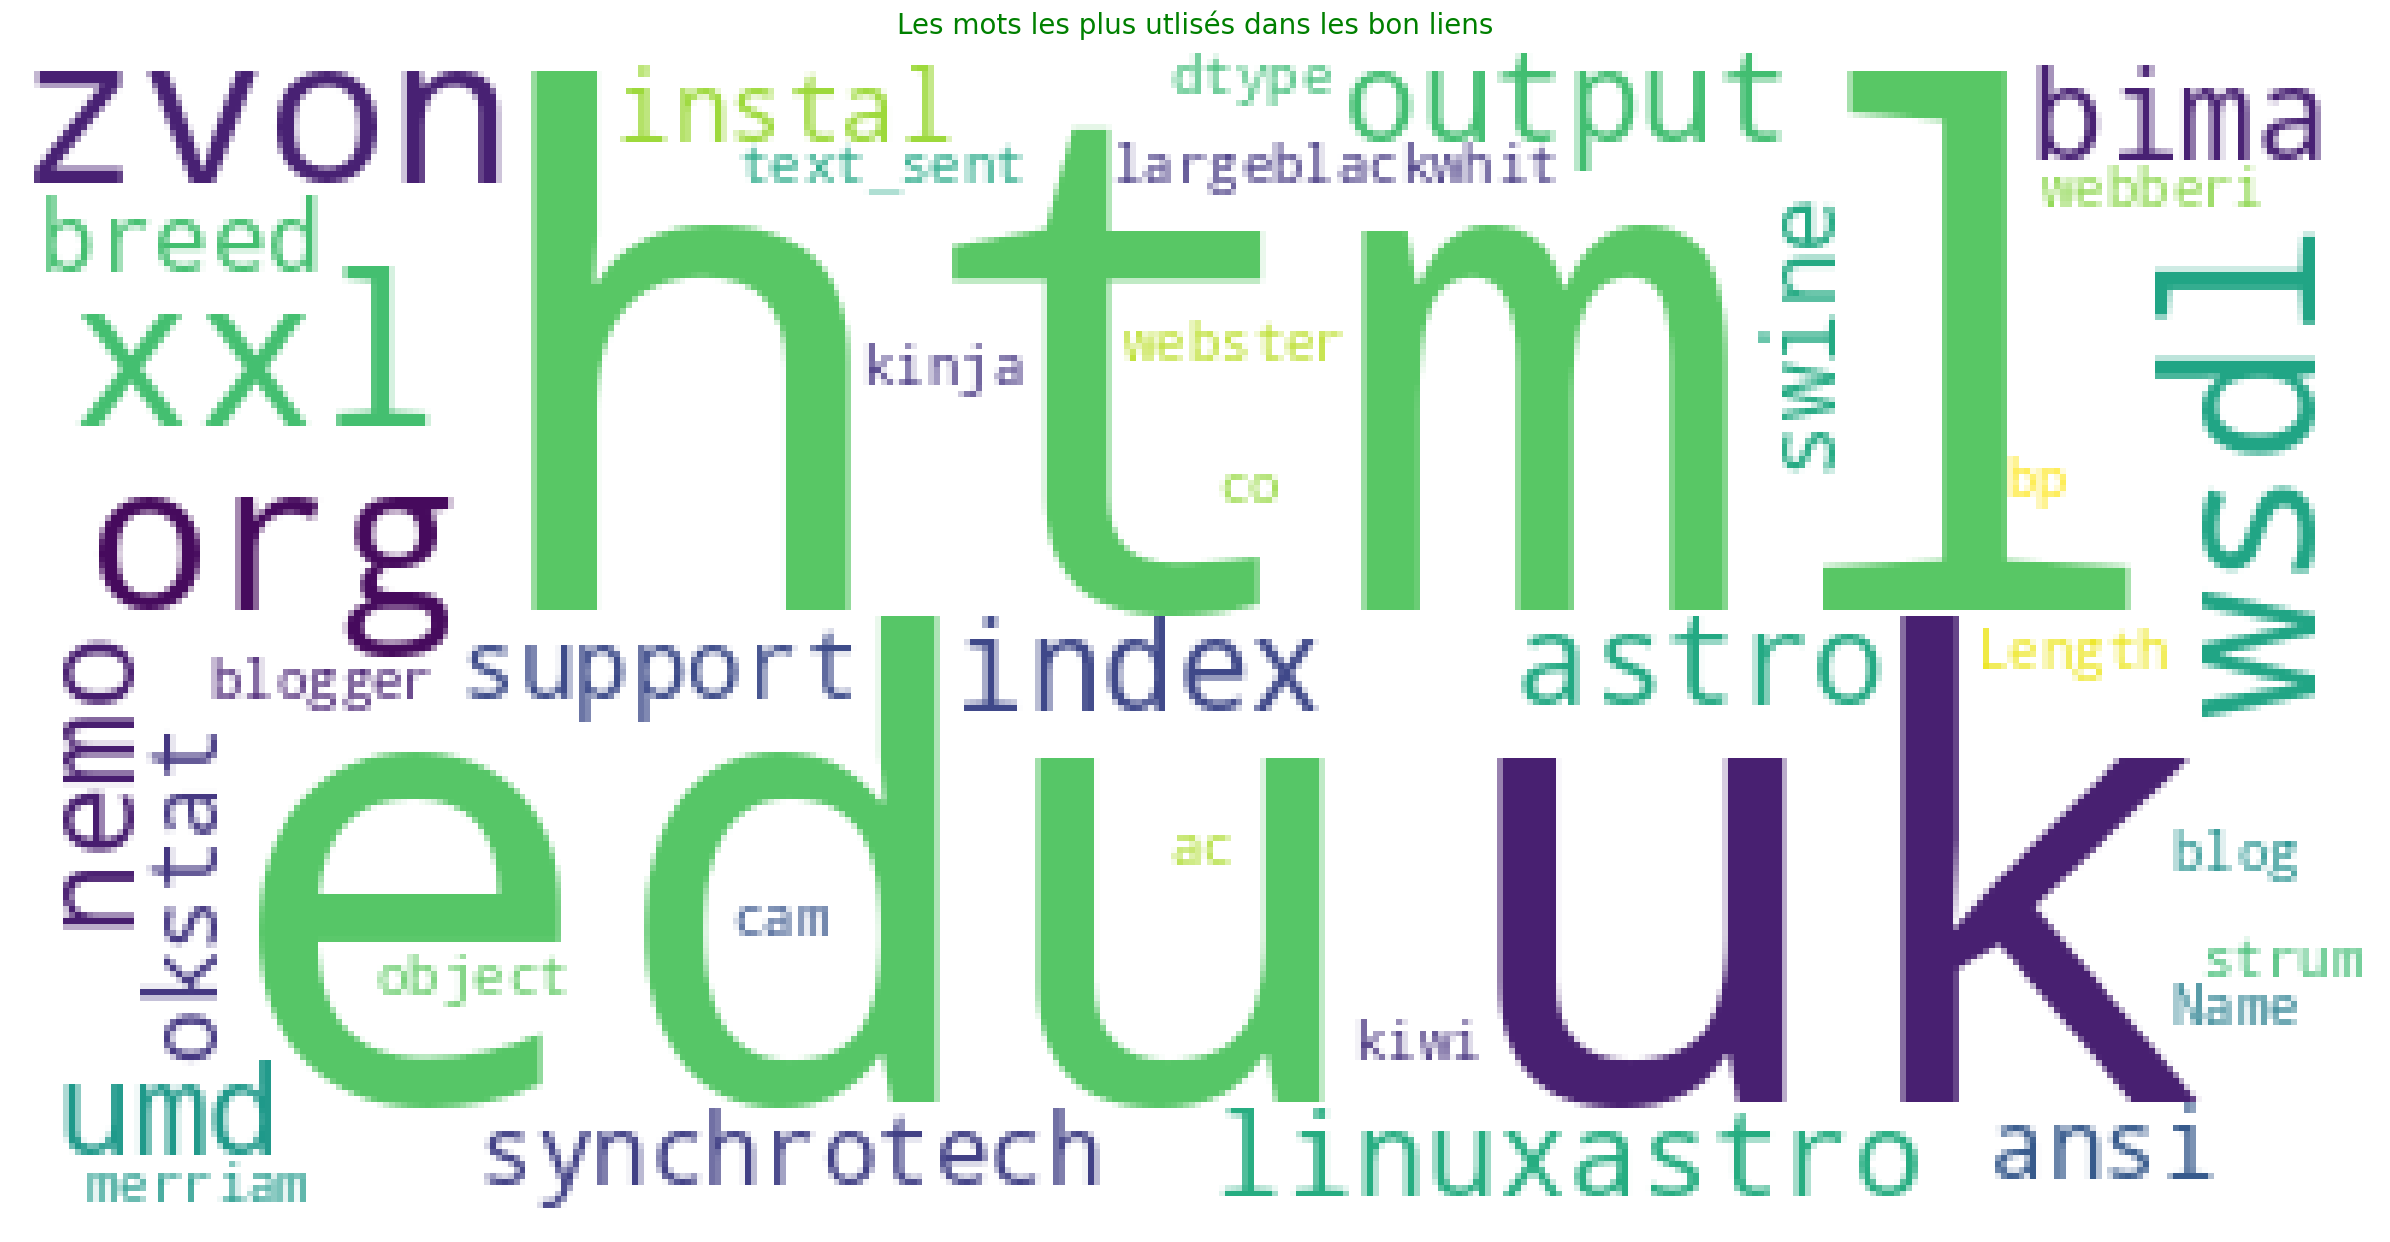

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)
common_text = str(data)
plot_word(common_text, mask= None, max_words=400, max_font_size=120, 
               title = 'Les mots les plus utlisés dans les bon liens', title_size=20)

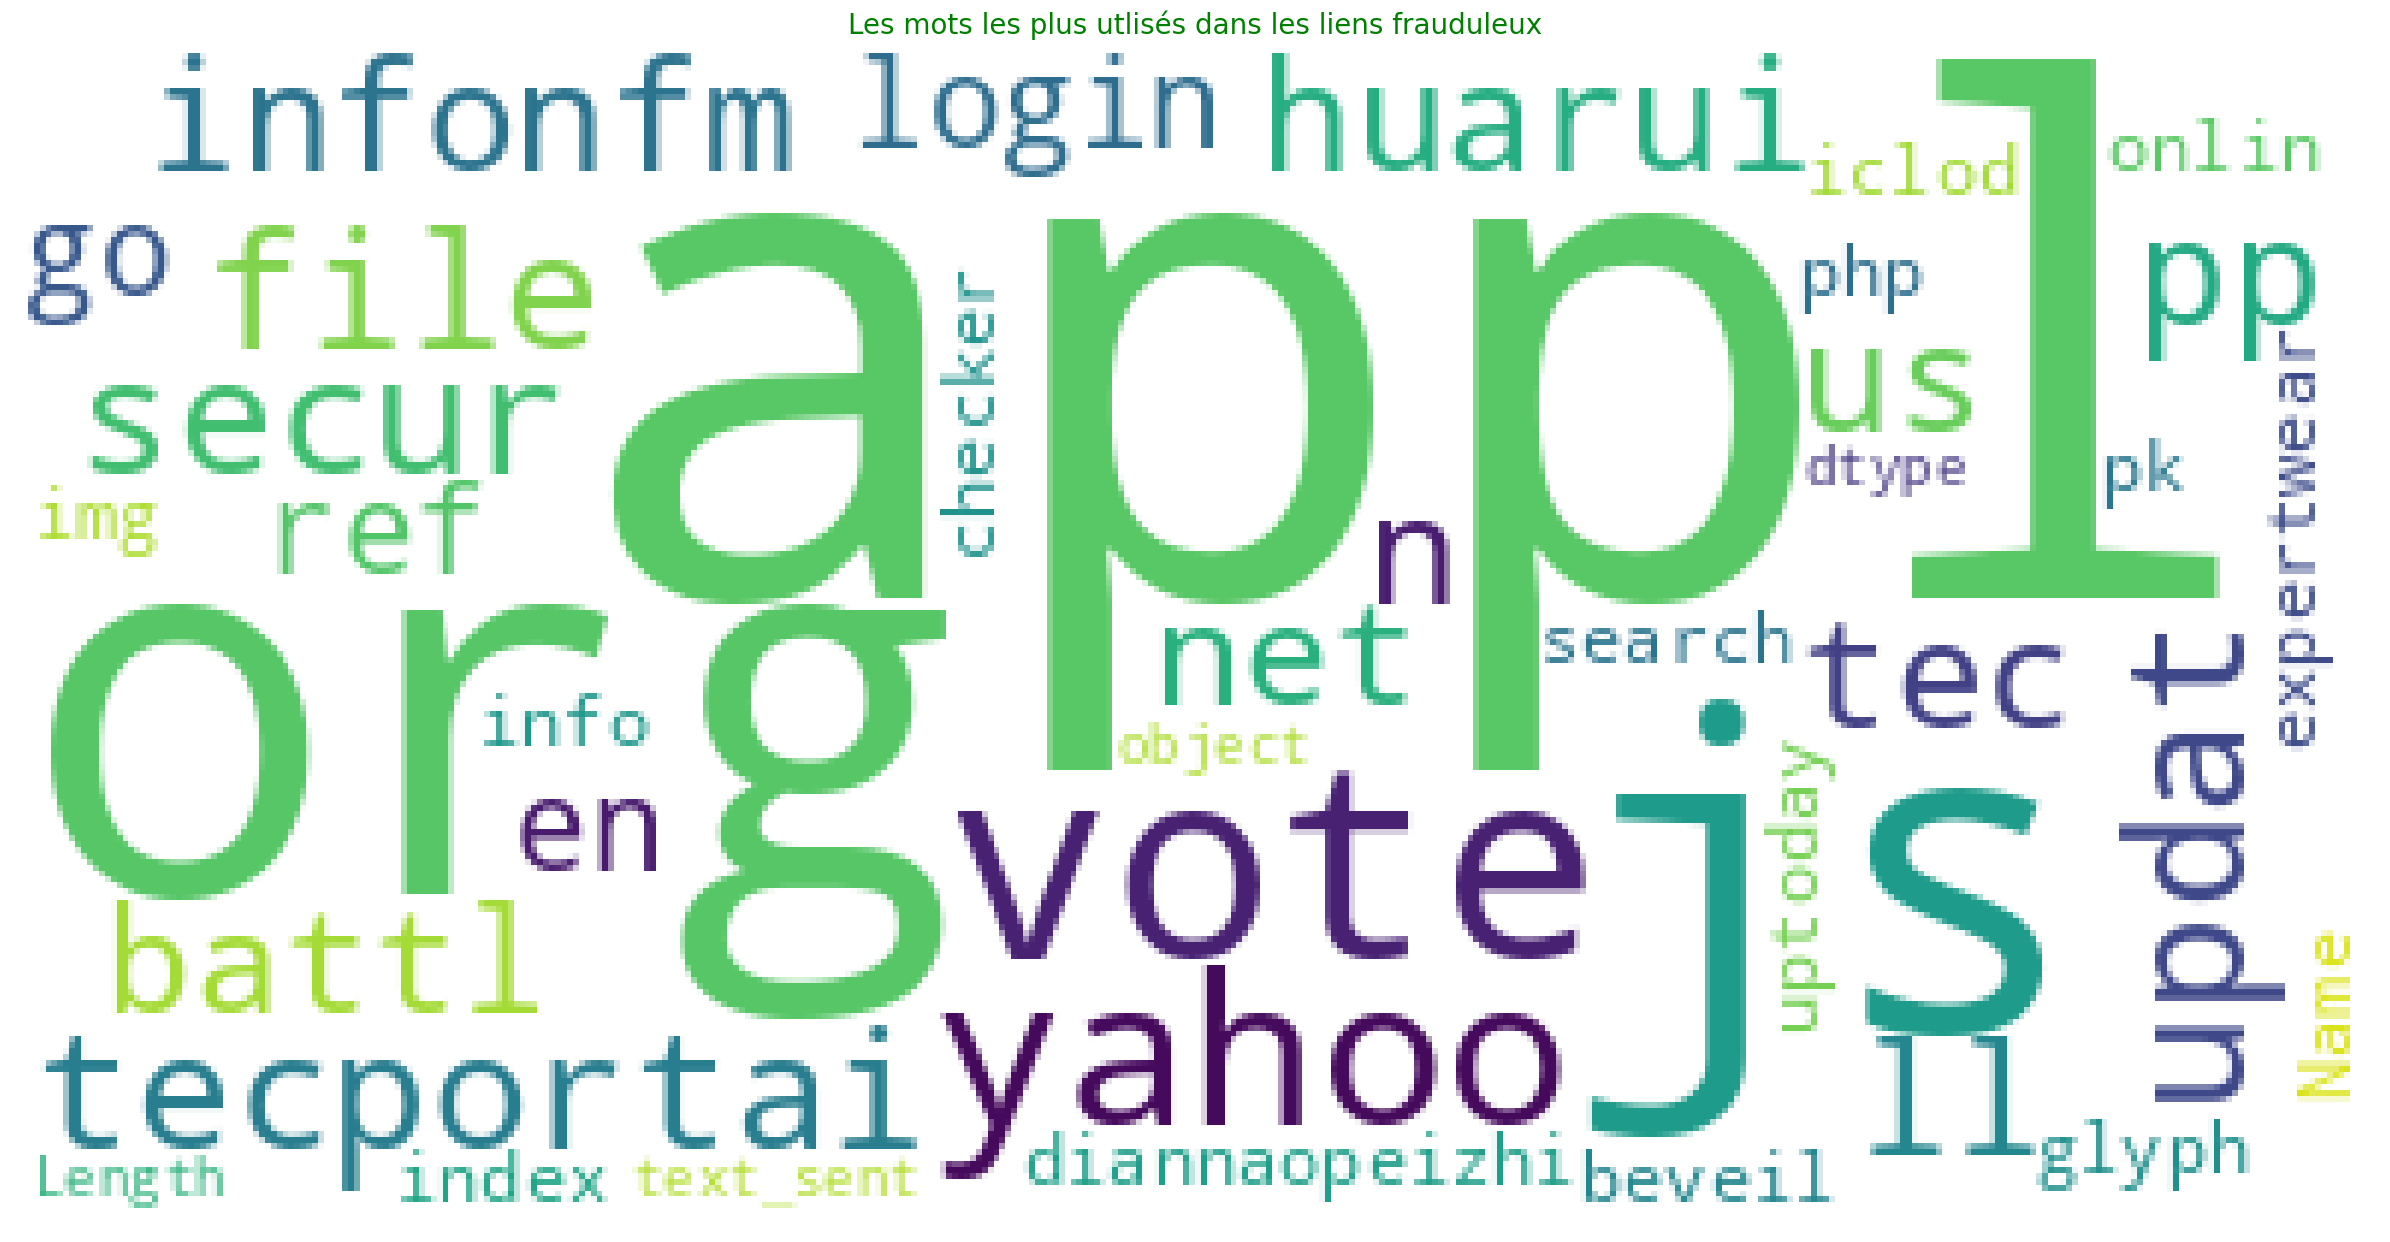

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)
common_text = str(data)
#common_mask = np.array(Image.open('comment.png'))
plot_word(common_text, mask= None, max_words=400, max_font_size=120, 
               title = 'Les mots les plus utlisés dans les liens frauduleux', title_size=20)

Déployement du modèle

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#diviser les données en deux données entrainement et de test
trainX, testX, trainY, testY = train_test_split(df2.domain, df2.label, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [ ]:
#création du pipeline et entrainement du modèle
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
pipeline_ls.fit(trainX,trainY)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
#taux de précision avec les données d'entrainement
pipeline_ls.score(testX,testY) 

0.9635646276248859

In [ ]:

print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))

Training Accuracy : 0.9777523749898683
Testing Accuracy : 0.9635646276248859


In [ ]:
import pickle
pickle.dump(pipeline_ls,open('/model.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('/model.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9635646276248859


In [ ]:
#teste
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('/model.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

[1 1 1 1]
******************************
[0 0 0 0]
